In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# Charger les données
df = pd.read_csv("compositions-du-trafic-2.csv", sep=";")
df.head()

,année,site,tronçon,arrondissement,coordonnées,latitude,longitude,période,heure,catégories de véhicules,données,secteur
0,2016-01-01,Porte de Saint-Cloud,en direction de la Porte d'Auteuil,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,08h-09h,Cars,13.000000,Boulevard Périphérique
1,2016-01-01,Porte de Saint-Cloud,en direction de la Porte d'Auteuil,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,14h-15h,Véhicules Utilitaires,786.000000,Boulevard Périphérique
2,2016-01-01,Porte de Saint-Cloud,en direction de la Porte de Sèvres,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,07h-08h,Taxis,125.666667,Boulevard Périphérique
3,2016-01-01,Porte de Saint-Cloud,en direction de la Porte de Sèvres,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,08h-09h,Cars,5.333333,Boulevard Périphérique
4,2016-01-01,Porte de Saint-Cloud,en direction de la Porte de Sèvres,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,10h-11h,Véhicules Utilitaires,960.666667,Boulevard Périphérique


In [101]:
# Convertir les colonnes utiles
df["année"] = pd.to_datetime(df["année"], errors='coerce').dt.year
df["données"] = pd.to_numeric(df["données"], errors='coerce')

In [102]:
# Trier les tranches horaires
heure_order = sorted(df["heure"].dropna().unique(), key=lambda x: int(x.split('h')[0]))
df["heure"] = pd.Categorical(df["heure"], categories=heure_order, ordered=True)

In [103]:
# Filtrer les catégories de véhicules pour exclure certains types
exclude_categories = ["Vélib's", "Vélos Personnels", "Trottinettes"]
df = df[~df["catégories de véhicules"].isin(exclude_categories)]

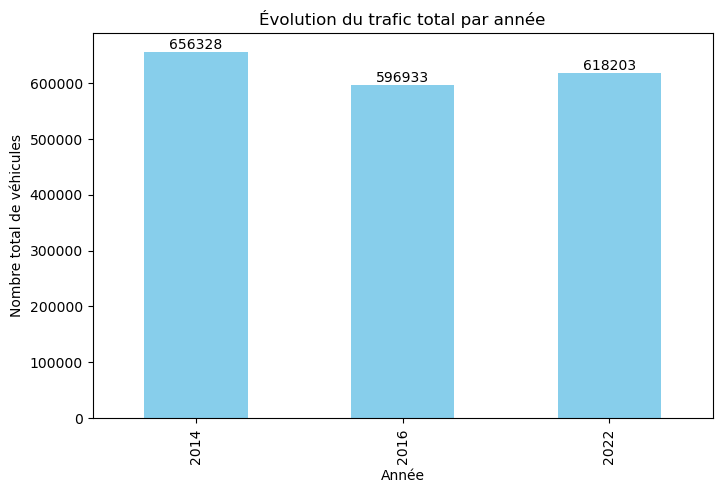

In [104]:
# 1. Évolution du trafic total par année
plt.figure(figsize=(8, 5))
ax = df.groupby("année")["données"].sum().plot(kind="bar", color="skyblue")
plt.title("Évolution du trafic total par année")
plt.ylabel("Nombre total de véhicules")
plt.xlabel("Année")

# Ajouter les valeurs au-dessus des barres
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

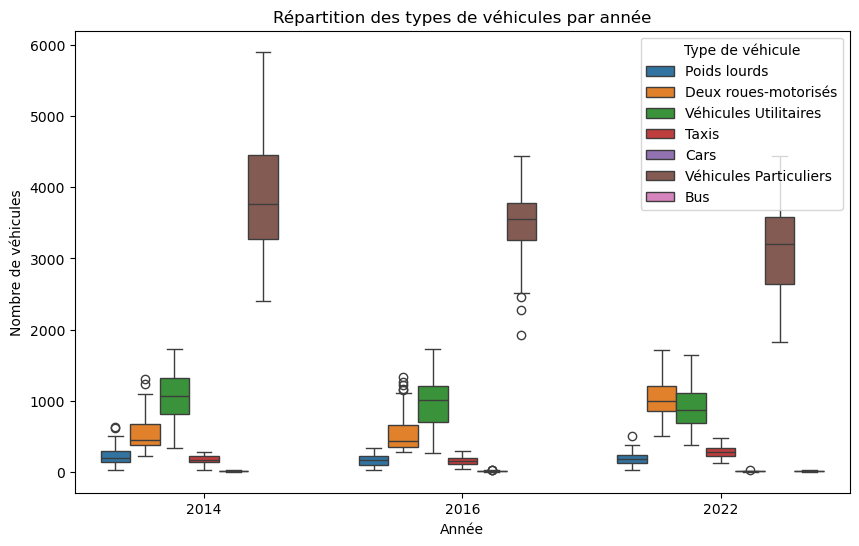

In [105]:
# 2. Répartition des types de véhicules
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="année", y="données", hue="catégories de véhicules")
plt.title("Répartition des types de véhicules par année")
plt.ylabel("Nombre de véhicules")
plt.xlabel("Année")
plt.legend(title="Type de véhicule")
plt.show()

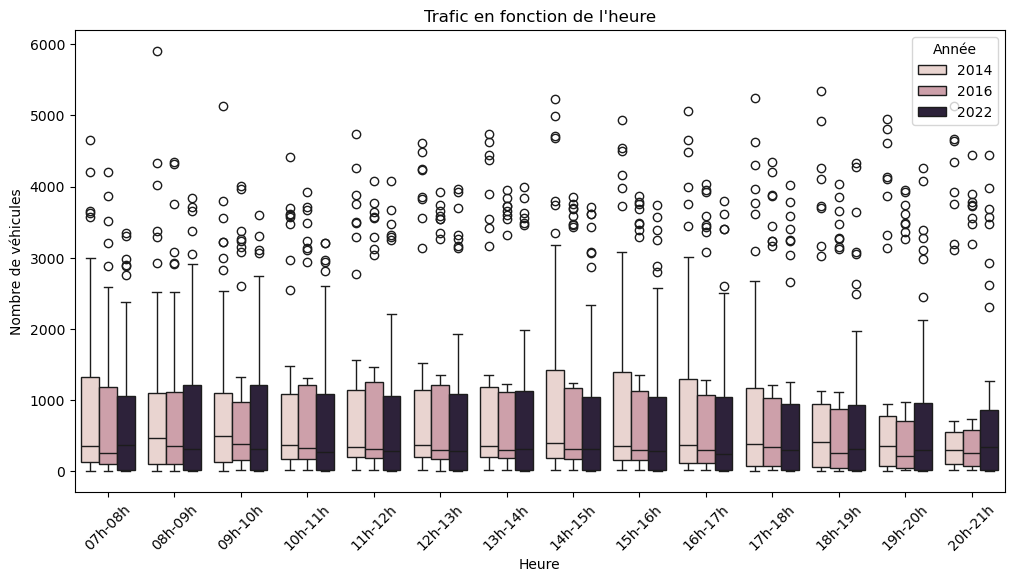

In [106]:
# 3.1 Trafic en fonction de l'heure
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="heure", y="données", hue="année")
plt.xticks(rotation=45)
plt.title("Trafic en fonction de l'heure")
plt.ylabel("Nombre de véhicules")
plt.xlabel("Heure")
plt.legend(title="Année")
plt.show()

/var/folders/fm/kg5b8n7n4ns6lqqnwn6zhhkr0000gn/T/ipykernel_85639/1828897046.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hourly = df.groupby(["heure", "année"])["données"].sum().reset_index()


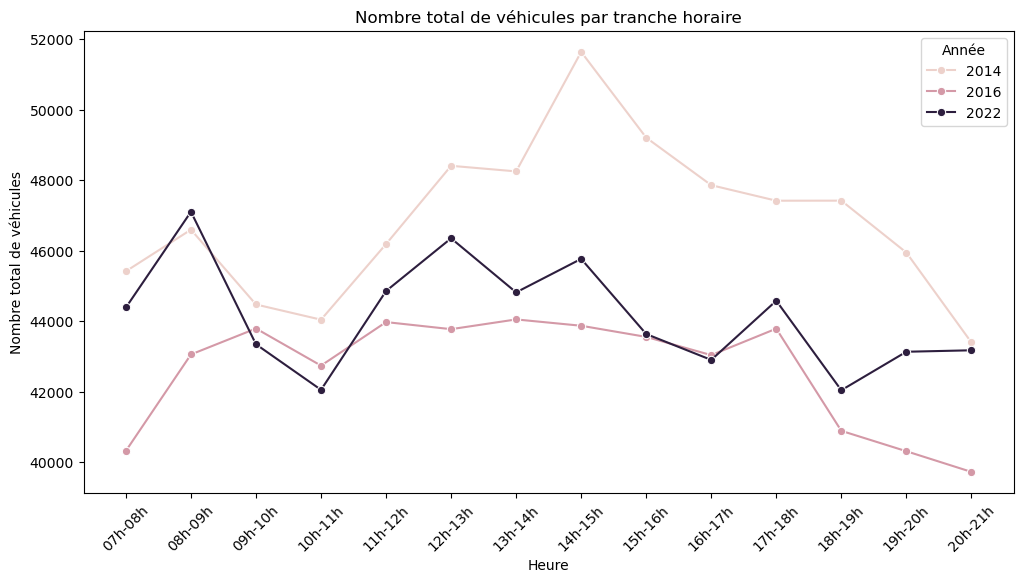

In [107]:
# 3.2 Trafic en fonction de l'heure (Line Plot au lieu de Boxplot)
plt.figure(figsize=(12, 6))
df_hourly = df.groupby(["heure", "année"])["données"].sum().reset_index()
sns.lineplot(data=df_hourly, x="heure", y="données", hue="année", marker="o")
plt.xticks(rotation=45)
plt.title("Nombre total de véhicules par tranche horaire")
plt.ylabel("Nombre total de véhicules")
plt.xlabel("Heure")
plt.legend(title="Année")
plt.show()

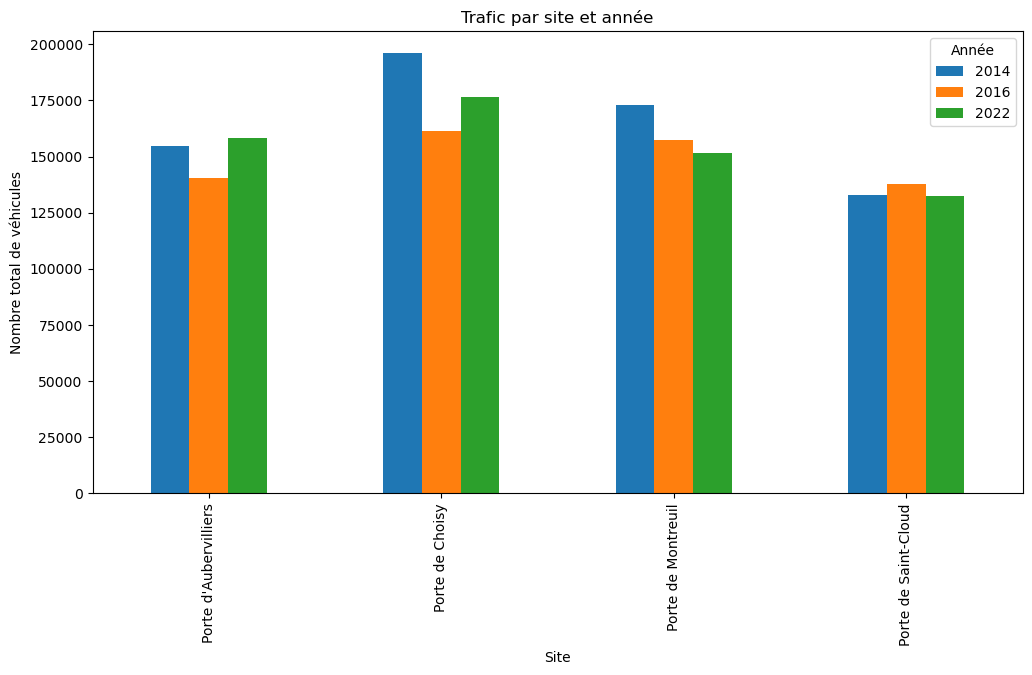

In [108]:
# 4. Trafic par site et tronçon
df_site = df.groupby(["site", "année"])["données"].sum().unstack()
df_site.plot(kind="bar", figsize=(12, 6))
plt.title("Trafic par site et année")
plt.ylabel("Nombre total de véhicules")
plt.xlabel("Site")
plt.xticks(rotation=90)
plt.legend(title="Année")
plt.show()

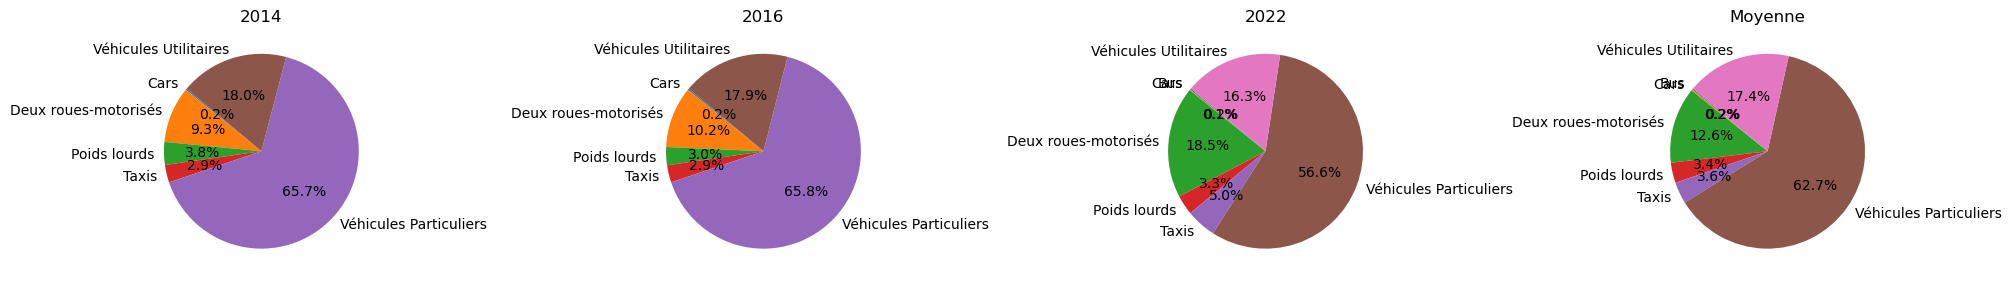

In [116]:
# 5. Diagrammes en rond du pourcentage de chaque type de véhicule par année dans une seule figure
annees = sorted(df["année"].unique())  # Tri des années dans l'ordre
n = len(annees) + 1  # +1 pour la moyenne
fig, axes = plt.subplots(1, n, figsize=(5*n, 5))

for i, annee in enumerate(annees):
    df_vehicules = df[df["année"] == annee].groupby("catégories de véhicules")["données"].sum()
    axes[i].pie(df_vehicules, labels=df_vehicules.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f"{annee}")

# 6. Diagramme en rond pour la moyenne des années
avg_vehicules = df.groupby("catégories de véhicules")["données"].mean()
axes[-1].pie(avg_vehicules, labels=avg_vehicules.index, autopct='%1.1f%%', startangle=140)
axes[-1].set_title("Moyenne")

plt.tight_layout()
plt.show()

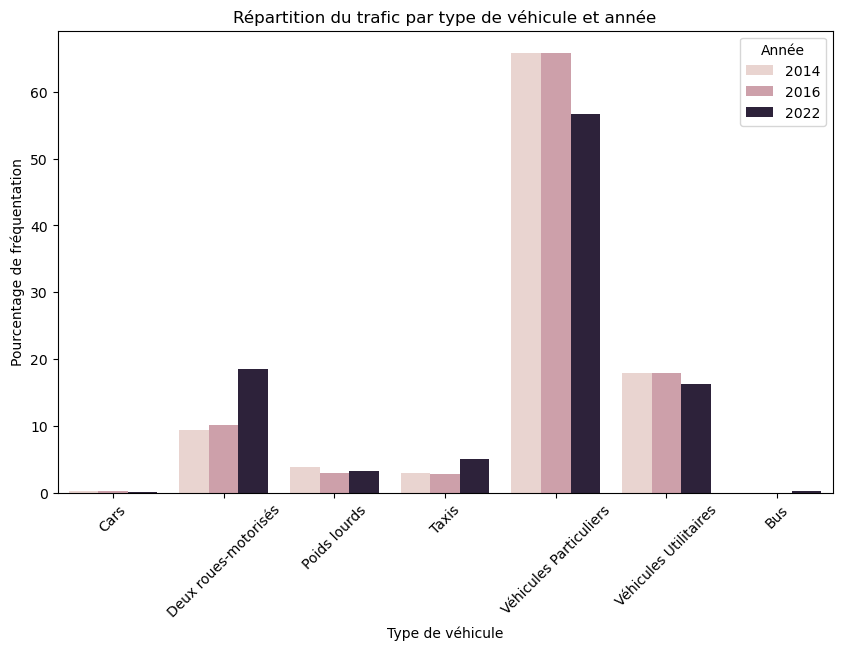

In [111]:
# 7. Diagramme en barres du pourcentage de fréquentation par type de véhicule et année
df_totals = df.groupby(["année", "catégories de véhicules"]) ["données"].sum().reset_index()
df_totals["Pourcentage"] = df_totals.groupby("année")["données"].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(10, 6))
sns.barplot(data=df_totals, x="catégories de véhicules", y="Pourcentage", hue="année")
plt.xticks(rotation=45)
plt.ylabel("Pourcentage de fréquentation")
plt.xlabel("Type de véhicule")
plt.title("Répartition du trafic par type de véhicule et année")
plt.legend(title="Année")
plt.show()

In [114]:
df_totals

,année,catégories de véhicules,données,Pourcentage
0,2014,Cars,1561.666667,0.237940
1,2014,Deux roues-motorisés,61348.666667,9.347253
2,2014,Poids lourds,24807.666667,3.779765
3,2014,Taxis,19245.666667,2.932323
4,2014,Véhicules Particuliers,431349.333333,65.721577
5,2014,Véhicules Utilitaires,118015.333333,17.981143
6,2016,Cars,1421.333333,0.238106
7,2016,Deux roues-motorisés,60801.000000,10.185560
8,2016,Poids lourds,17923.333333,3.002569
9,2016,Taxis,17099.333333,2.864530
